# Example 2. Logistic regresion
---
Logistic regression is a classification learning algorithm, instead of regression. The major idea of the algorithm is based on probability for *intersted event*, it's set $p$, and the value is within $0<p<1$. The ratio of interst probability, called *odds ratio*, is defined $\frac{p}{1-p}$. The logistic function is defined as 

$$
\begin{equation}
logist(p)=\log\frac{p}{1-p}\ ,
\end{equation}
$$

which is also called *log-odds*. When the $p$ is greater (smaller) than 0.5, the $logist(p)$ is postive (negtive), which can make the certain threshold for classication. Moreover, the $logist(p)$ can be made by feature variables with certain weights as 

$$
\begin{equation}
\begin{split}
logist\left(p(y=1|X)\right)&=w_0x_0+w_1x_1+...+w_mx_m \\
&= w^TX \\
&= z(w)\ ,
\end{split}
\end{equation}
$$

where $p(y=1|X)$ means the probability of $y=1$, which the interest (target) class, with givan $X$. Since we are interested the outcome of $p$ which is correlated to $z(w)$, the correlation can be obtained by

$$
\begin{equation}
\begin{split}
z &= \log\frac{p}{1-p} \\
e^{-z}&=\frac{1}{p}-1 \\
p &= \frac{1}{1+e^{z}}\ .
\end{split}
\end{equation}
$$

The $p$ is replaced to $\phi(z)$ as an objactive function as 
$$
\begin{equation}
\phi(z) = \frac{1}{1+e^{z}}\ ,
\end{equation}
$$

which has S-curvature behavior and is called **sigmoid function**. The function represents the probality of intersted class for inputting data. By giving the threshold $\phi(z)>0.5$, the data can be classified to the interested or non-interested event as $y=1$ or $y=0$, respectively, which is also correspoding to $z>0$. The visulization of sigmoid function is as following:

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def sigmoid(z):
    return 1./(1.+np.exp(-z))

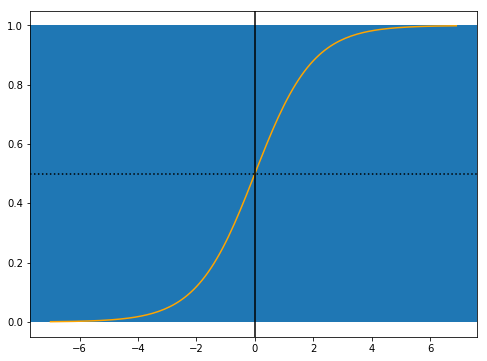

In [3]:
z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)
plt.figure(figsize=(8, 6))
plt.plot(z, phi_z, c='orange') # sigmoid line
plt.axvline(0., color='k') # vertical line at 0
plt.axhspan(0., 1., alpha=1, ls='dotted')
plt.axhline(y=0.5, ls='dotted', color='k')
plt.show()

The cost function $J(w)$ of logistic regression is designed by likelihood function $L(w)$, which is defined as

$$
\begin{equation}
\begin{split}
L(w) = P(y|X;w) &= \prod_{i=1}^{n}P(y^{(i)}|x^{(i)};w) \\
&= \prod_{i=1}^{n}\left(\phi\left(z^{(i)}\right)^{y^{(i)}}\right)\left(1-\phi\left(z^{(i)}\right)^{y^{(i)}}\right)\ ,
\end{split}
\end{equation}
$$

where $y$ is either 1 or 0, which makes only a term left either $\phi\left(z^{(i)}\right)^{y^{(i)}}$ or $1-\phi\left(z^{(i)}\right)^{y^{(i)}}$, respectively. The maximum $L(w)$ is the optimazied solution which is the same as the minimum solution of $-\log L(w)$, defined as  

$$
\begin{equation}
l(w) = -\log L(w)= -\sum_{i=1}^{n}\left(y^{(i)}\right)\log\left(\phi\left(z^{(i)}\right)^{y^{(i)}}\right)+\left(1-y^{(i)}\right)\log\left(1-\phi\left(z^{(i)}\right)^{y^{(i)}}\right)\ .
\end{equation}
$$

Thus the **cost function $J(w)$** is defined by $l(w)$.

### 1\. Import Iris datasets and modules

In [4]:
from sklearn import datasets
import numpy as np

In [5]:
iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target
np.unique(y)

array([0, 1, 2])

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [7]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=0 )
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

### 2\. Logistic regression by Sklearn
#### Fit and prediction

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
lr = LogisticRegression( C=1000.0, random_state=0) # C is regularization parameter
lr.fit(X_train_std, y_train)

LogisticRegression(C=1000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=0,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [10]:
from plot_decision_regions import plot_decision_regions
import matplotlib.pyplot as plt

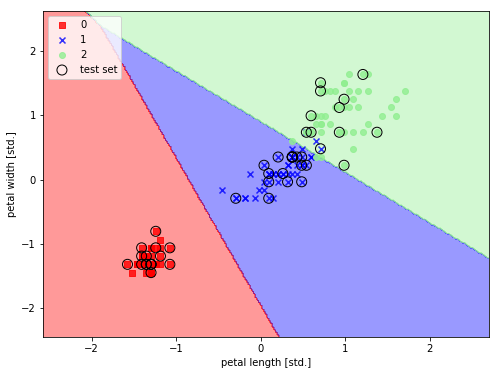

In [11]:
plt.figure(figsize=(8, 6))

X_combined_std = np.vstack( (X_train_std, X_test_std) )
y_combined = np.hstack( (y_train, y_test) )
plot_decision_regions( X=X_combined_std, y=y_combined, classifier=lr, test_idx=range(105,150) )
plt.xlabel('petal length [std.]')
plt.ylabel('petal width [std.]')
plt.legend(loc='upper left')
plt.show()

#### Prediction

In [15]:
lr.predict_proba(X_test_std[0,:])

/Users/Alpha/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([[  2.05743774e-11,   6.31620264e-02,   9.36837974e-01]])

This means **93.7%** is Iris-Virginica, **6.3%** is Iris-Versicolor

### 3\. Regularization by L2

In the above test, we introduce a parameter **C** for fit which is called *regularization parameter*. The regularization is for avoiding the overfitting during training and obtainting a smooth trained model, i.e. reducing the effect from noice data. Here we first introduce one of regularization terms called **L2 regularization** and defined as

$$
\begin{equation}
\frac{\lambda}{2}||w||^2=\frac{\lambda}{2}\sum_{j=1}^{m}w^2_j\ .
\end{equation}
$$

The term in added in cost function of logistic regression as

$$
\begin{equation}
J(w) = -\sum_{i=1}^{n}\left(y^{(i)}\right)\log\left(\phi\left(z^{(i)}\right)^{y^{(i)}}\right)+\left(1-y^{(i)}\right)\log\left(1-\phi\left(z^{(i)}\right)^{y^{(i)}}\right)+\frac{\lambda}{2}||w||^2\ .
\end{equation}
$$

We can re-define the cost function by replacing $C=\frac{1}{\lambda}$ as

$$
\begin{equation}
J(w) = C\left[-\sum_{i=1}^{n}\left(y^{(i)}\right)\log\left(\phi\left(z^{(i)}\right)^{y^{(i)}}\right)+\left(1-y^{(i)}\right)\log\left(1-\phi\left(z^{(i)}\right)^{y^{(i)}}\right)\right]+\frac{1}{2}||w||^2\ ,
\end{equation}
$$

where $C$ is called *inverse regularization parameter*. Following is showing the effect of tuning the regularization parameter:

In [18]:
weights, params = [], []
for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10.**c, random_state=0)
    lr.fit( X_train_std, y_train)
    weights.append( lr.coef_[1] )
    params.append(10.**c)
weights = np.array(weights)

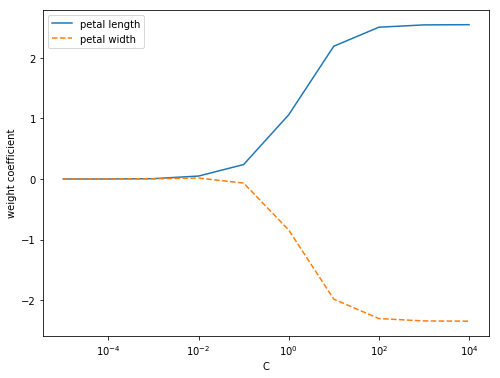

In [20]:
plt.figure(figsize=(8, 6))
plt.plot(params, weights[:, 0], label='petal length')
plt.plot(params, weights[:, 1], label='petal width', linestyle='--')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()

As **C** is small ($\lambda$ is large), the strength of weights is weak which makes the objective function (model) is smooth, i.e. the regularization is strong. However, as **C** is getting large ($\lambda$ is small), the strength of weights is strong, and it may enhance the effect of noice, which is the lower regularization case.